### Download the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Import the data in excel file and format them

In [3]:
df_raw =  pd.read_excel('séries_AirLiquide.xlsx')
df_raw.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [4]:
df = df_raw
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [5]:
df['year']=[x.split("M")[0] for x in df['Unnamed: 0']]
df['month']=[x.split("M")[1] for x in df['Unnamed: 0']]
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month
0,1987M03,0.305684,11.1670,NaN,1987,03
1,1987M04,0.306773,11.8679,NaN,1987,04
2,1987M05,0.307862,11.3422,NaN,1987,05
3,1987M06,0.308952,11.0714,NaN,1987,06
4,1987M07,0.310043,10.9918,NaN,1987,07
5,1987M08,0.311138,11.1511,1483.02,1987,08
6,1987M09,0.312236,11.0873,1524.00,1987,09
7,1987M10,0.313339,10.8962,1456.88,1987,10
8,1987M11,0.314448,8.5226,1116.47,1987,11
9,1987M12,0.315563,7.9969,1026.98,1987,12


In [6]:
df['log_return_price'] = np.log(df['Prix Airliquide']/df['Prix Airliquide'].shift(1)) # p(t)/p(t-1)
df['log_return_CAC40'] = np.log(df['Indice CAC40']/df['Indice CAC40'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month,log_return_price,log_return_CAC40
0,1987M03,0.305684,11.1670,NaN,1987,03,NaN,NaN
1,1987M04,0.306773,11.8679,NaN,1987,04,0.060874,NaN
2,1987M05,0.307862,11.3422,NaN,1987,05,-0.045307,NaN
3,1987M06,0.308952,11.0714,NaN,1987,06,-0.024165,NaN
4,1987M07,0.310043,10.9918,NaN,1987,07,-0.007216,NaN
...,...,...,...,...,...,...,...,...
392,2019M11,2.465649,118.4500,5761.89,2019,11,0.041088,0.060659
393,2019M12,2.474304,119.6000,5786.74,2019,12,0.009662,0.004304
394,2020M01,2.482985,126.7000,6041.50,2020,01,0.057669,0.043083
395,2020M02,2.491688,131.9000,5832.51,2020,02,0.040222,-0.035205


In [7]:
#COVAR(O3:O394;$Y$3:$Y$394)/VARP($Y$3:$Y$394)
year = '2020'
ret_price_year = df['log_return_price'][df['year'] == year]
ret_CAC_40_year = df['log_return_CAC40'][df['year'] == year]

x = ret_price_year.values
y = ret_CAC_40_year.values

matrix_xy = np.stack((x, y), axis=0)
print(ret_price_year)
print(ret_CAC_40_year)
matrix_xy

394    0.057669
395    0.040222
396   -0.053330
Name: log_return_price, dtype: float64
394    0.043083
395   -0.035205
396   -0.089436
Name: log_return_CAC40, dtype: float64


array([[ 0.05766925,  0.04022197, -0.0533304 ],
       [ 0.04308323, -0.03520489, -0.08943601]])

In [8]:
beta = []
years = df['year'].unique()
for year in years :
    ret_price_year = df['log_return_price'][df['year'] == year]
    ret_CAC_40_year = df['log_return_CAC40'][df['year'] == year]

    x = ret_price_year.values
    y = ret_CAC_40_year.values

    matrix_xy = np.stack((x, y), axis=0)
    
    var_y = np.var(y)
    cov_matrix = np.cov(matrix_xy)
    cov_xy = cov_matrix[1,0]
    beta_xy = cov_xy/var_y
    
    beta.append(beta_xy)
    
print(len(beta))
print(len(years))

34
34


In [9]:
dividend_yearly = df.groupby('year')['Div AirLiquide (lissé)'].mean().round(3)
price_yearly = df.groupby('year')['Prix Airliquide'].mean().round(3)
indiceCAC40_yearly = df.groupby('year')['Indice CAC40'].mean().round(3)
return_IndiceCAC40_yearly = df.groupby('year')['log_return_CAC40'].mean().round(3)

In [10]:
df_yearly = pd.concat([dividend_yearly, price_yearly, indiceCAC40_yearly, return_IndiceCAC40_yearly], axis=1)
df_yearly['beta'] = beta
df_yearly.head(10)

,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,log_return_CAC40,beta
year,,,,,
1987,0.311,10.609,1321.470,-0.092,NaN
1988,0.323,8.497,1229.658,0.030,1.170711
1989,0.336,10.926,1750.667,0.022,1.544345
1990,0.350,12.387,1859.954,-0.013,0.898183
1991,0.371,12.834,1764.264,0.003,0.803905
1992,0.398,14.827,1846.913,0.004,0.500614
1993,0.425,16.328,2012.700,0.016,0.904070
1994,0.448,17.275,2065.525,-0.007,0.845330
1995,0.469,18.181,1869.042,-0.007,0.381206


In [11]:
df_yearly['Dividend'] = df_yearly['Div AirLiquide (lissé)']
df_yearly['Price'] = df_yearly['Prix Airliquide']
df_yearly['CAC40_basis_points'] = df_yearly['Indice CAC40']
df_yearly['return_CAC40'] = df_yearly['log_return_CAC40']
df_yearly.drop(columns = ['Div AirLiquide (lissé)','Prix Airliquide','Indice CAC40','log_return_CAC40'],inplace=True)
df_yearly

,beta,Dividend,Price,CAC40_basis_points,return_CAC40
year,,,,,
1987,NaN,0.311,10.609,1321.470,-0.092
1988,1.170711,0.323,8.497,1229.658,0.030
1989,1.544345,0.336,10.926,1750.667,0.022
1990,0.898183,0.350,12.387,1859.954,-0.013
1991,0.803905,0.371,12.834,1764.264,0.003
1992,0.500614,0.398,14.827,1846.913,0.004
1993,0.904070,0.425,16.328,2012.700,0.016
1994,0.845330,0.448,17.275,2065.525,-0.007
1995,0.381206,0.469,18.181,1869.042,-0.007


In [12]:
df_yearly['Dividend_Rate'] = df_yearly['Dividend'].pct_change(1)
df_yearly

,beta,Dividend,Price,CAC40_basis_points,return_CAC40,Dividend_Rate
year,,,,,,
1987,NaN,0.311,10.609,1321.470,-0.092,NaN
1988,1.170711,0.323,8.497,1229.658,0.030,0.038585
1989,1.544345,0.336,10.926,1750.667,0.022,0.040248
1990,0.898183,0.350,12.387,1859.954,-0.013,0.041667
1991,0.803905,0.371,12.834,1764.264,0.003,0.060000
1992,0.500614,0.398,14.827,1846.913,0.004,0.072776
1993,0.904070,0.425,16.328,2012.700,0.016,0.067839
1994,0.845330,0.448,17.275,2065.525,-0.007,0.054118
1995,0.381206,0.469,18.181,1869.042,-0.007,0.046875


In [13]:
# Year 1987 should be removed because there is not enough data for the CAC 40 index
df_yearly.drop(['1987'], axis=0, inplace=True)
df_yearly 

,beta,Dividend,Price,CAC40_basis_points,return_CAC40,Dividend_Rate
year,,,,,,
1988,1.170711,0.323,8.497,1229.658,0.030,0.038585
1989,1.544345,0.336,10.926,1750.667,0.022,0.040248
1990,0.898183,0.350,12.387,1859.954,-0.013,0.041667
1991,0.803905,0.371,12.834,1764.264,0.003,0.060000
1992,0.500614,0.398,14.827,1846.913,0.004,0.072776
1993,0.904070,0.425,16.328,2012.700,0.016,0.067839
1994,0.845330,0.448,17.275,2065.525,-0.007,0.054118
1995,0.381206,0.469,18.181,1869.042,-0.007,0.046875
1996,0.786398,0.492,20.877,2082.438,0.020,0.049041


In [14]:
french_treasuries_bonds =  pd.read_excel('tx_dintéret_OAT.xlsx',sheet_name = 'Final', header = None)
french_treasuries_bonds.columns = ['year','french_bonds_rate']
french_treasuries_bonds['year'] = french_treasuries_bonds['year'].astype(str)
french_treasuries_bonds.set_index('year', inplace = True)
french_treasuries_bonds.head(10)

,french_bonds_rate
year,
1999,3.410000
2000,0.700000
2001,3.280000
2002,3.310000
2003,2.450000
2004,2.370000
2005,4.210000
2006,2.910000
2007,1.875000


### Now we need to cross the intervals of time with data available from both dataframes. in our case, the data are fine between 1999 and 2020

In [15]:
french_treasuries_bonds.drop(['2021', '2022'], axis = 0, inplace = True)
french_treasuries_bonds

,french_bonds_rate
year,
1999,3.410000
2000,0.700000
2001,3.280000
2002,3.310000
2003,2.450000
2004,2.370000
2005,4.210000
2006,2.910000
2007,1.875000


In [16]:
df_yearly.iloc[:11,:].index

Index(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998'],
      dtype='object', name='year')

In [17]:
df_yearly.drop(df_yearly.iloc[:11,:].index, axis = 0, inplace = True)
df_yearly

,beta,Dividend,Price,CAC40_basis_points,return_CAC40,Dividend_Rate
year,,,,,,
1999,0.750548,0.655,27.822,4464.609,0.032,0.129310
2000,0.150562,0.752,29.066,6353.173,0.008,0.148092
2001,-0.121145,0.870,32.785,5085.517,-0.024,0.156915
2002,0.421490,0.979,33.140,3866.780,-0.025,0.125287
2003,0.622865,1.038,30.311,3115.573,0.004,0.060266
2004,0.807549,1.027,33.690,3699.040,0.008,-0.010597
2005,0.806305,0.988,37.058,4247.107,0.017,-0.037975
2006,1.038258,1.009,44.525,5095.468,0.010,0.021255
2007,0.505131,1.103,52.345,5752.749,0.006,0.093162


In [18]:
df_yearly_final = pd.concat([df_yearly,french_treasuries_bonds], axis = 1)

df_yearly_final

,beta,Dividend,Price,CAC40_basis_points,return_CAC40,Dividend_Rate,french_bonds_rate
year,,,,,,,
1999,0.750548,0.655,27.822,4464.609,0.032,0.129310,3.410000
2000,0.150562,0.752,29.066,6353.173,0.008,0.148092,0.700000
2001,-0.121145,0.870,32.785,5085.517,-0.024,0.156915,3.280000
2002,0.421490,0.979,33.140,3866.780,-0.025,0.125287,3.310000
2003,0.622865,1.038,30.311,3115.573,0.004,0.060266,2.450000
2004,0.807549,1.027,33.690,3699.040,0.008,-0.010597,2.370000
2005,0.806305,0.988,37.058,4247.107,0.017,-0.037975,4.210000
2006,1.038258,1.009,44.525,5095.468,0.010,0.021255,2.910000
2007,0.505131,1.103,52.345,5752.749,0.006,0.093162,1.875000


## Estimation of the model

### We will use the Least Square Error Method to find the coefficients from the linearization Y = A*G + U

In [208]:
dividend = df_yearly_final['Dividend']
dividend_rate = df_yearly_final['Dividend_Rate']
price = df_yearly_final['Price']
return_CAC40 = df_yearly_final['return_CAC40']
french_bonds_rate = df_yearly_final['french_bonds_rate']
beta = df_yearly_final['beta']

#### 1st approach : we consider A0 unknown 

In [209]:
Y1 = (dividend.shift(-1)/price)-french_bonds_rate
Y2 = beta*(return_CAC40 - french_bonds_rate)
Y = Y1 - Y2
gt = dividend_rate
print(Y)
print(gt)

year
1999   -0.847618
2000   -0.565879
2001   -3.650403
2002   -1.873008
2003   -0.892590
2004   -0.433242
2005   -0.801935
2006    0.125722
2007   -0.907450
2008   -1.381409
2009   -0.262745
2010   -0.913895
2011   -1.151766
2012   -1.049054
2013   -0.507877
2014    0.368353
2015    0.121842
2016    0.070969
2017    0.598679
2018    0.127652
2019   -0.032160
2020         NaN
dtype: float64
year
1999    0.129310
2000    0.148092
2001    0.156915
2002    0.125287
2003    0.060266
2004   -0.010597
2005   -0.037975
2006    0.021255
2007    0.093162
2008    0.113327
2009    0.092834
2010    0.070790
2011    0.070981
2012    0.075374
2013    0.071903
2014    0.063134
2015    0.057794
2016    0.050627
2017    0.049618
2018    0.053182
2019    0.047475
2020    0.026782
Name: Dividend_Rate, dtype: float64


In [210]:
# Get rid of the nan values
Y=Y[:-1]
gt=gt[:-1]

Y=np.array(Y.values)
Y=np.transpose(Y)
G=np.array([np.ones(len(gt)),gt.values])
G=np.transpose(G)
print(Y)
print(G)
print(Y.shape)
print(G.shape)

[-0.84761828 -0.56587922 -3.65040343 -1.87300819 -0.89259023 -0.43324232
 -0.80193501  0.12572223 -0.9074501  -1.3814091  -0.26274478 -0.91389529
 -1.1517663  -1.049054   -0.50787698  0.36835342  0.12184222  0.07096923
  0.59867872  0.12765193 -0.03216024]
[[ 1.          0.12931034]
 [ 1.          0.1480916 ]
 [ 1.          0.15691489]
 [ 1.          0.12528736]
 [ 1.          0.06026558]
 [ 1.         -0.0105973 ]
 [ 1.         -0.03797468]
 [ 1.          0.02125506]
 [ 1.          0.09316155]
 [ 1.          0.11332729]
 [ 1.          0.09283388]
 [ 1.          0.07078987]
 [ 1.          0.07098121]
 [ 1.          0.07537362]
 [ 1.          0.07190332]
 [ 1.          0.06313416]
 [ 1.          0.05779427]
 [ 1.          0.05062657]
 [ 1.          0.04961832]
 [ 1.          0.05318182]
 [ 1.          0.04747518]]
(21,)
(21, 2)


In [211]:
 # Use results from Least Square Error to find the coefficient vector A from the linearization Y = A*G + U
A_1st_part = np.linalg.inv(np.matmul(np.transpose(G),G)) # (inverse of G transpose times G)
A_2nd_part = np.matmul(np.transpose(G),Y) # (G transpose times Y)
A=np.matmul(A_1st_part,A_2nd_part)
A

array([  0.10044228, -10.62522848])

Text(0, 0.5, 'Y term containing the future price')

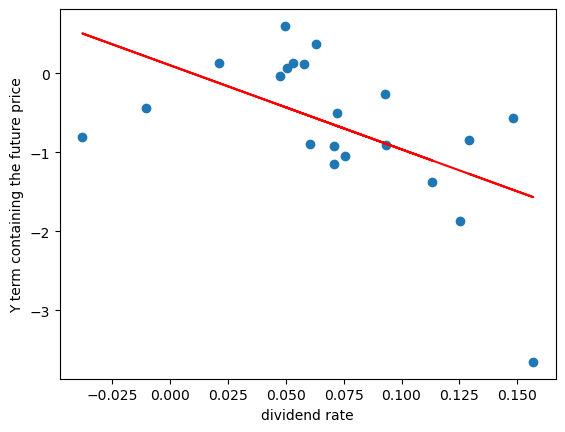

In [212]:
# check graphically the coefficients are good
A0 = A[0]
A1 = A[1]
X = gt.values
Y_pred = A0 + A1*X


plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

#### 2nd approach: we suppose A0 is known and depends on the average rate

In [220]:
Y = (dividend.shift(-1)/price)-french_bonds_rate
gt = dividend_rate

##### 1st method: use the mean on all the period

In [221]:
# Reshape the input and output
A0 = beta*(return_CAC40-french_bonds_rate)
A0 = A0.mean()
Y_prime = Y - A0

Y = Y[:-1] # remove the nan value as seen before
Y_prime = Y_prime[:-1] # remove the nan value as seen before
gt = gt[:-1] # remove the nan value as seen before
print(A0)
print(Y_prime)
print(gt)

-1.5319452815761883
year
1999   -1.851026
2000    0.861877
2001   -1.718194
2002   -1.746733
2003   -0.884173
2004   -0.808729
2005   -2.650827
2006   -1.353282
2007   -0.319595
2008   -2.676102
2009   -2.082927
2010   -1.557688
2011   -1.762529
2012   -0.977455
2013   -0.646142
2014   -0.108056
2015    0.713095
2016    1.092234
2017    0.747872
2018    0.772943
2019    1.424795
dtype: float64
year
1999    0.129310
2000    0.148092
2001    0.156915
2002    0.125287
2003    0.060266
2004   -0.010597
2005   -0.037975
2006    0.021255
2007    0.093162
2008    0.113327
2009    0.092834
2010    0.070790
2011    0.070981
2012    0.075374
2013    0.071903
2014    0.063134
2015    0.057794
2016    0.050627
2017    0.049618
2018    0.053182
2019    0.047475
Name: Dividend_Rate, dtype: float64


In [222]:
# Apply LSE to compute the coefficient A1
numerator_A1 = sum((Y_prime-Y_prime.mean())*(gt-gt.mean()))
denominator_A1 = sum(pow(gt.values-gt.mean(),2))
print(numerator_A1)
print(denominator_A1)
print(A1)

-0.10800084394054285
0.04554736804164807
-10.62522848279589


In [223]:
# Check if the coefficients are consistent 
A0_prime = Y_prime.mean() - A1*gt.mean()
print(A0_prime)
print(A0)
print(A1)

0.020783941618920942
-1.5319452815761883
-10.62522848279589


21
21
21


Text(0, 0.5, 'Y term containing the future price')

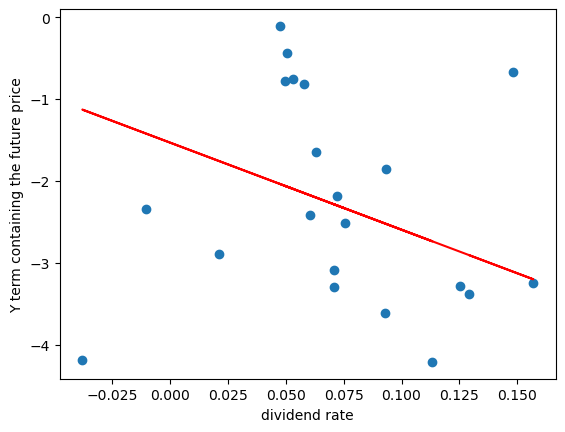

In [224]:
# check graphically the coefficients are good
X = gt.values
Y_pred = A0 + A1*X

print(len(X))
print(len(Y_pred))
print(len(Y))
plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')